In [13]:
#
#
# Daily return
#
# Return at time t R_t is defined as 
#               P_t
#     R_t = ------------   - 1
#             P_(t-1)
# Price at time t, divided by the price at time t-1 (previous day) minus 1
# This gives the percent gain/loss if you get one stock on day t minus one and sold it the next day
# This can be used to analize the volatility of the stock
# If the distribution is wide, the stock is more volatile
# e.g. if the stock has a stable price then R_t is always zero..
#

In [ ]:
#
#
# Let's plot this, i.e. we add a column to each df from the close price cloumn
# There are 2 ways to do this
# - pandas native pct_change
# - the shift() function that uses the formula above

In [3]:
import yfinance as yf
import pandas as pd
import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
%matplotlib inline
import pprint

In [4]:
# set the start and end dates for our market data request to be TTM
end_date = datetime.datetime.today()
start_date = end_date - timedelta(days=365)

# set the name of the ticker we want to download market data for
tickers = ["TSLA", "F", "GM" ]


In [5]:
df = yf.download(
    tickers=tickers,
    start=start_date,
    end=end_date,
    interval="1d",
    group_by="ticker",
    auto_adjust=True,
    progress=False
)

<Axes: xlabel='Date'>

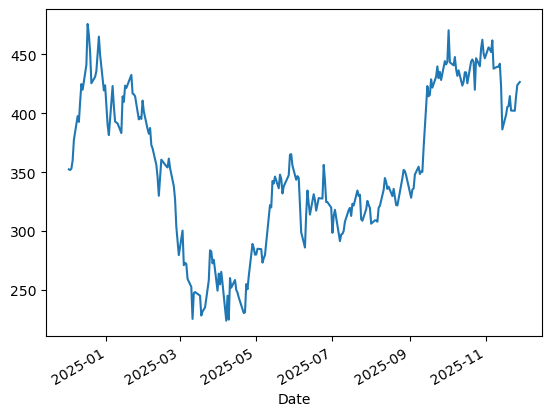

In [6]:
df['TSLA','Open'].plot()

In [7]:
#
#  Just showing how to work with multiple index
pprint.pprint((df['TSLA']['Close'] == df['TSLA','Close']).head(5))
print("---------")
pprint.pprint(df['TSLA']['Close'].head(5))
print("---------")
pprint.pprint(df['TSLA']['Close'].shift(1).head(5))
#
# Note that the shift(1) will move the prices forward one day
# which means that for day X we will get the price of X-1 
# which is exactly what we want

Date
2024-12-02    True
2024-12-03    True
2024-12-04    True
2024-12-05    True
2024-12-06    True
dtype: bool
---------
Date
2024-12-02    357.089996
2024-12-03    351.420013
2024-12-04    357.929993
2024-12-05    369.489990
2024-12-06    389.220001
Name: Close, dtype: float64
---------
Date
2024-12-02           NaN
2024-12-03    357.089996
2024-12-04    351.420013
2024-12-05    357.929993
2024-12-06    369.489990
Name: Close, dtype: float64


In [21]:
for t in tickers:
    print(f"--------\n\nSetting column Daily Return: 'returns (using shift)' for {t}\n") 
    df[t,'returns'] = ( df[t]['Close'] / df[t]['Close'].shift(1) ) -1
    pprint.pprint(df[t].head(5))

--------

Setting column Daily Return: 'returns (using shift)' for TSLA

Price             Open        High         Low       Close    Volume   returns
Date                                                                          
2024-12-02  352.380005  360.000000  351.149994  357.089996  77986500       NaN
2024-12-03  351.799988  355.690002  348.200012  351.420013  58267200 -0.015878
2024-12-04  353.000000  358.100006  348.600006  357.929993  50810900  0.018525
2024-12-05  359.869995  375.429993  359.500000  369.489990  81403600  0.032297
2024-12-06  377.420013  389.489990  370.799988  389.220001  81455800  0.053398
--------

Setting column Daily Return: 'returns (using shift)' for F

Price            Open       High        Low      Close    Volume   returns
Date                                                                      
2024-12-02  10.445972  10.473903  10.203909  10.222528  50034400       NaN
2024-12-03  10.231839  10.250460  10.073566  10.073566  43904300 -0.014572
2024

In [23]:
df1 = df.copy()
for t in tickers:
    print(f"--------\n\nSetting column Daily Return: 'returns (using df.pct_change)' for {t}\n") 
    df1[t,'returns'] = df1[t,'Close'].pct_change(1)
    pprint.pprint(df1[t].head(5))

--------

Setting column Daily Return: 'returns (using df.pct_change)' for TSLA

Price             Open        High         Low       Close    Volume   returns
Date                                                                          
2024-12-02  352.380005  360.000000  351.149994  357.089996  77986500       NaN
2024-12-03  351.799988  355.690002  348.200012  351.420013  58267200 -0.015878
2024-12-04  353.000000  358.100006  348.600006  357.929993  50810900  0.018525
2024-12-05  359.869995  375.429993  359.500000  369.489990  81403600  0.032297
2024-12-06  377.420013  389.489990  370.799988  389.220001  81455800  0.053398
--------

Setting column Daily Return: 'returns (using df.pct_change)' for F

Price            Open       High        Low      Close    Volume   returns
Date                                                                      
2024-12-02  10.445972  10.473903  10.203909  10.222528  50034400       NaN
2024-12-03  10.231839  10.250460  10.073566  10.073566  4390430

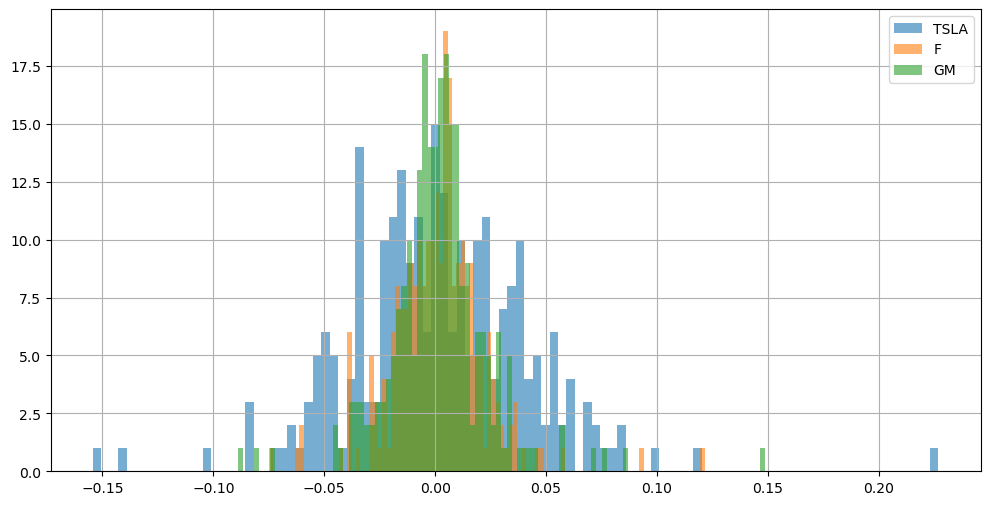

In [44]:
#
# Now we plot the pct_change to visualize the volatilivty
#
for t in tickers:
    df[t]['returns'].hist(bins=100,figsize=(12,6), label=t, alpha=0.6)
plt.legend();    


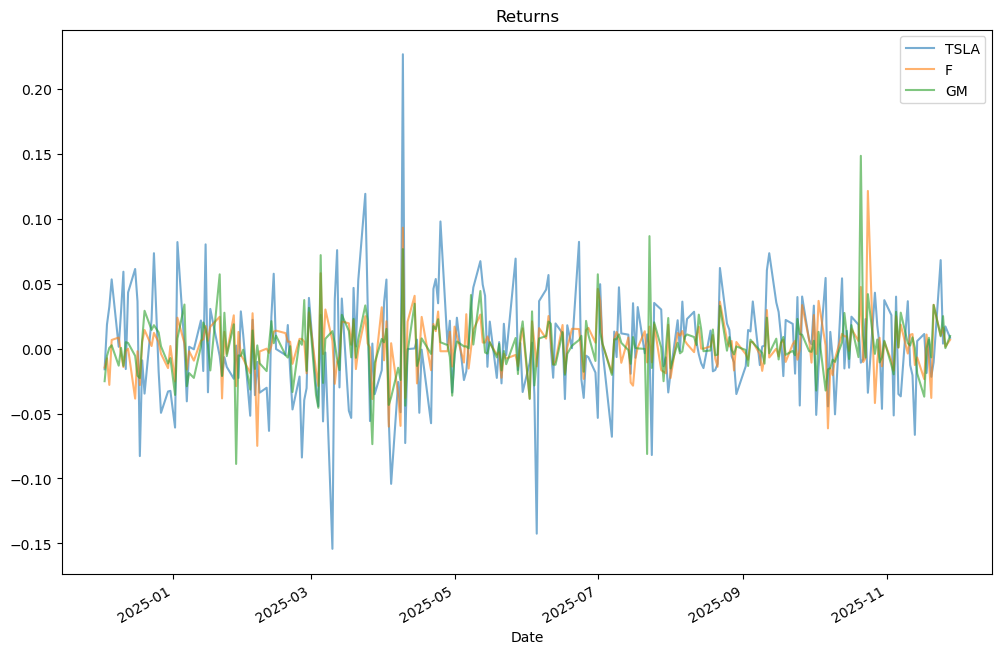

In [46]:
for t in tickers:
    df[t]['returns'].plot(figsize=(12,8), title='Returns',label=t, alpha=0.6)
plt.legend();    

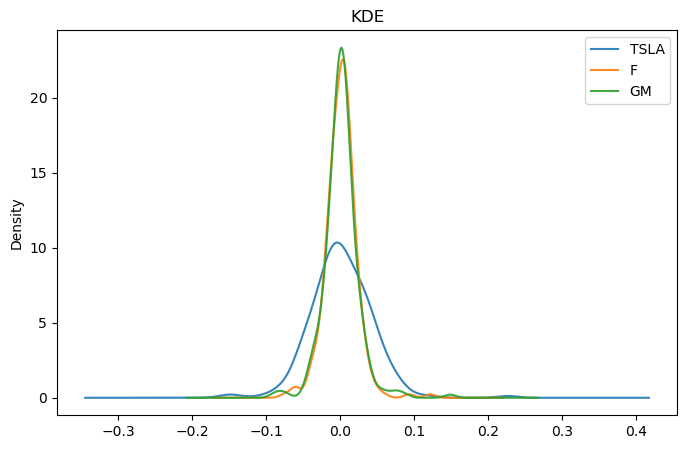

In [49]:
#
#
# Here we plot a Kernel Density Estimation (KDE) plot
# KDE applies a Kernel function to estimate, for each point fo the dataset
# the probability that another point in the dataset is close
# Results are then normalized to produce a smooth curve
for t in tickers:
    df[t]['returns'].plot(kind='kde', figsize=(8,5), title='KDE',label=t, alpha=0.9)
plt.legend();
#
# Highest peak around zero means more stability

                     TSLA Returns  F Returns  GM Returns
2024-12-02 00:00:00           NaN        NaN         NaN
2024-12-03 00:00:00     -0.015878  -0.014572   -0.025073
2024-12-04 00:00:00      0.018525  -0.007394   -0.005591
2024-12-05 00:00:00      0.032297  -0.027933    0.000562
2024-12-06 00:00:00      0.053398   0.006705    0.002628


<Axes: >

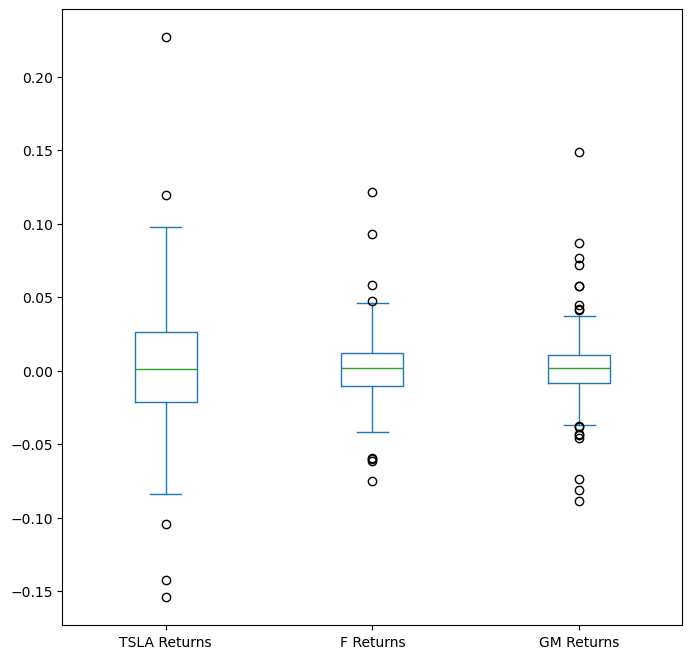

In [54]:
#
# 
# BOXPLOTS 
# I need to have the columns together in the same df
#
box_df = pd.DataFrame()
for t in tickers:
    # argument is a list of columns/df)
    box_df = pd.concat([box_df,  df[t]['returns']], axis=1)
box_df.columns = [x +' Returns' for x in tickers ]
pprint.pprint(box_df.head(5))
box_df.plot(kind='box',figsize=(8,8))

/var/folders/gn/kqmw_2pn20v4dptbpqx34zfw0000gn/T/ipykernel_69549/2388214789.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend();


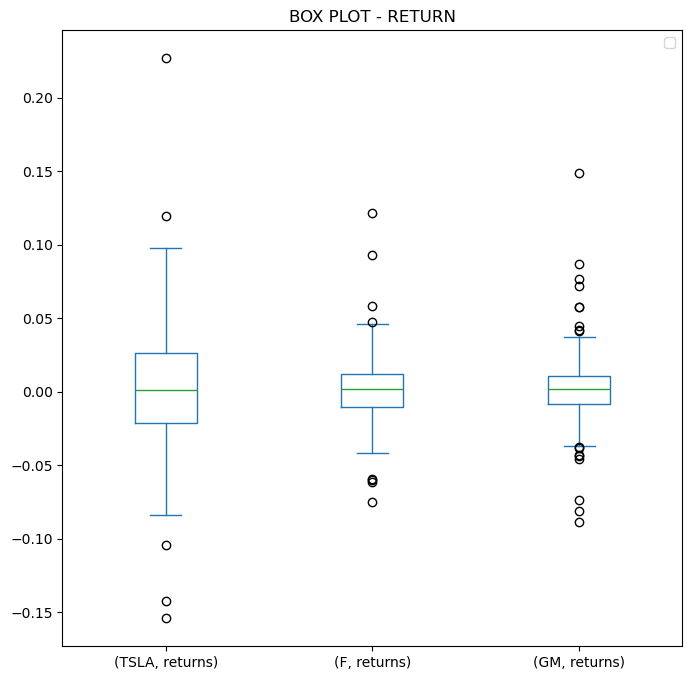

In [70]:
#
# I guess I could do the same with this]
# Note that I must use 'loc'
idx = pd.IndexSlice
df.loc[:, idx[:, 'returns']].plot(kind='box', figsize=(8,8), title= 'BOX PLOT - RETURN')
plt.legend();

In [ ]:
#
#
#
#
#

Text(0.5, 0.98, 'Returns - Scatter Matrix')

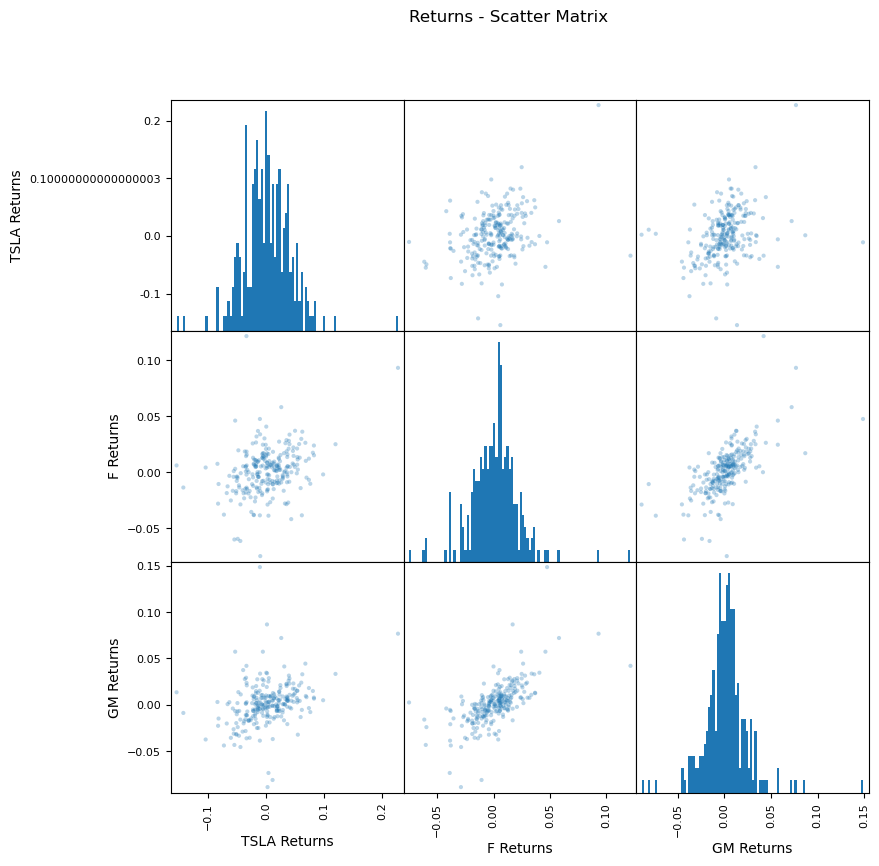

In [77]:
#
#
# SCATTER PLOT CORRELATION
#
#
from pandas.plotting import scatter_matrix

scatter_matrix(box_df, figsize=(9,9),alpha=0.3 , hist_kwds={'bins':100})
plt.suptitle("Returns - Scatter Matrix")


<Axes: xlabel='F Returns', ylabel='GM Returns'>

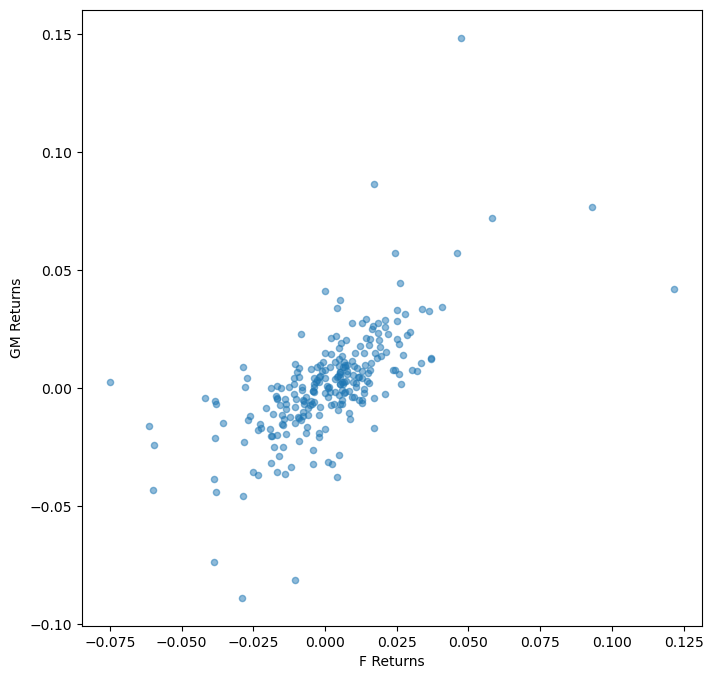

In [80]:
#
#
# FORD AND GM LOOK MUCH MORE CORRELATED.. LET's JUST PLOT THOSE 2
#
#
box_df.plot(kind='scatter', x='F Returns', y='GM Returns', alpha=0.5, figsize=(8,8))

In [ ]:
#
#
# CUMULATIVE DAILY RETURNS
#
#

In [ ]:
#
# Cumulative returns is the aggregate amount an investment has gained or lost over time
# indipendent of the period of time involved
#
# Note: the following calculation does not take into account stocks the give dividends
#
#  Assume ABC is a stock and the price goes as follows
#    10 
#    15
#    20
#    25
#    ...
#
# Daily Return would be: - , 50%, 33%, 20%
#
# Cumulative Return is related to the day the invetment is made
#
#  If you bought at day1 you would have Cumulative returns of:
#  100% (if sold at day 1) i.e. no gain.no loss
#  150% (if sold at day 2) 
#  200% (if sold at day 3) 
#  250% (if sold at day 4) 
#
#            Price Sold                    Starting Price * ( II of daily returns)
#    CMR = ---------------- * 100  ----> ----------------------------------------- * 100 = ...
#           Starting Price                             Starting Price
#
# If we expand the R_x 
#


In [81]:
#
# In terms of percentage daily return we have that
#
#  I_i = ( 1 + R_t ) * I_(t-1), 
#
#  e.g. I_2 == I_1 + I_1 * R_2 == I_1 * ( 1 + R_2 ) == (1 + R_2 ) * (1 + R_1) = 1 + R_1 + R_2 + R_1*R_2
#
#   I_3 == I_2 + I_2 * R_3 == (1 + R_3) * I_2 == ( 1 + R_3 ) * (1 + R_2 ) * (1 + R_1) == ......
#
# which makes sense as you get the return of the first day on the initial investment, the return on the second day
# on the initial investment and the return of the second day on the return of the first day
#
# so while the return is a percentage for a day variation, and > 0 is positive/GAIN and < 0 is negative/LOSS
# the cumulative return is a percentage on the overall investment
# less than one is LOSS and more than one is GAIN
# that is to say the investment at t-1 multiplied by (1 + percentage daily return)
#
#
# Pandas makes this formula easier with the function:  cumprod()
# The function gives the cumulative percentage > 0 is in GAIN and < 0 is in loss up to day X
# To get the value of your investment you need to add 1 to the DF Return value (see above) and then 
# call the cumprod() method (which just multiples the values of the previous days)

In [84]:
df1.head(5)

MultiIndex([('TSLA',    'Open'),
            ('TSLA',    'High'),
            ('TSLA',     'Low'),
            ('TSLA',   'Close'),
            ('TSLA',  'Volume'),
            (  'GM',    'Open'),
            (  'GM',    'High'),
            (  'GM',     'Low'),
            (  'GM',   'Close'),
            (  'GM',  'Volume'),
            (   'F',    'Open'),
            (   'F',    'High'),
            (   'F',     'Low'),
            (   'F',   'Close'),
            (   'F',  'Volume'),
            ('TSLA', 'returns'),
            (   'F', 'returns'),
            (  'GM', 'returns')],
           names=['Ticker', 'Price'])

In [85]:
for t in tickers:
    df[t,'Cumulative Return'] = ( df[t,'returns'] + 1).cumprod()

In [88]:
#
# The first time we get a value > 1 we are getting an actual return
df['TSLA'].head(5)

Price,Open,High,Low,Close,Volume,returns,Cumulative Return
Date,,,,,,,
2024-12-02,352.380005,360.000000,351.149994,357.089996,77986500,NaN,NaN
2024-12-03,351.799988,355.690002,348.200012,351.420013,58267200,-0.015878,0.984122
2024-12-04,353.000000,358.100006,348.600006,357.929993,50810900,0.018525,1.002352
2024-12-05,359.869995,375.429993,359.500000,369.489990,81403600,0.032297,1.034725
2024-12-06,377.420013,389.489990,370.799988,389.220001,81455800,0.053398,1.089977


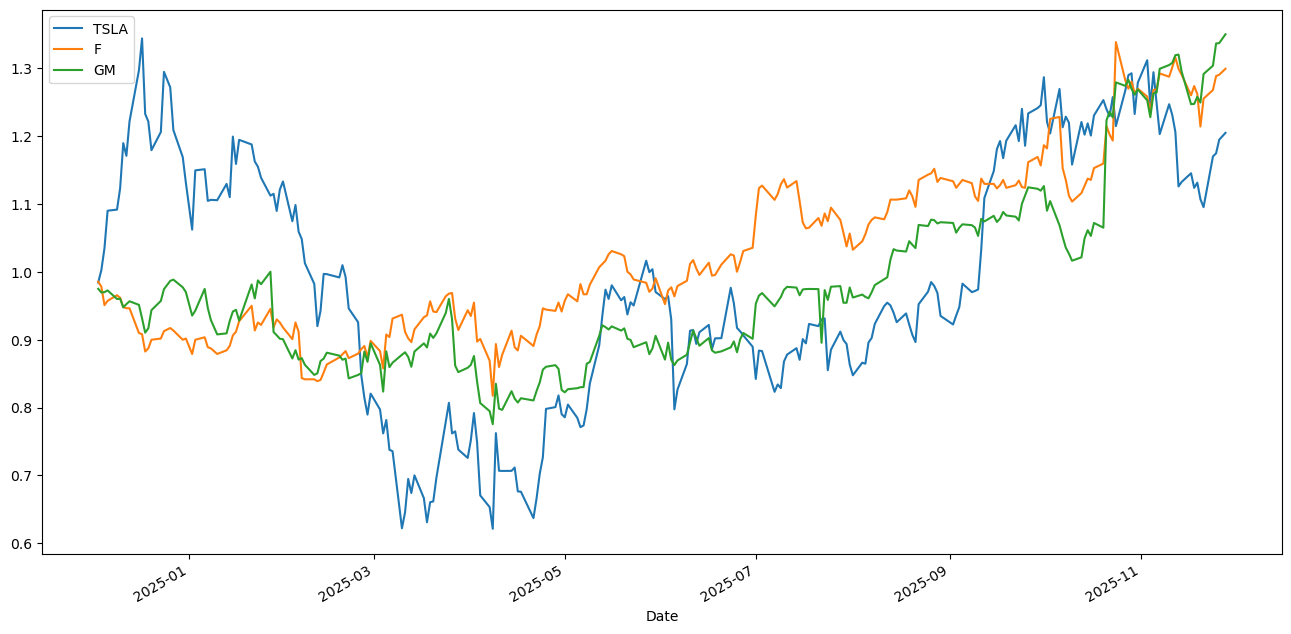

In [94]:
for x in tickers:
    df[x]['Cumulative Return'].plot(label=x, figsize=(16,8))
plt.legend()    